In [7]:
%matplotlib widget
import matplotlib.pyplot as plt

In [16]:
class BlitManager:
    def __init__(self, canvas, animated_artists=()):
        """
        Parameters
        ----------
        canvas : FigureCanvasAgg
            The canvas to work with, this only works for subclasses of the Agg
            canvas which have the `~FigureCanvasAgg.copy_from_bbox` and
            `~FigureCanvasAgg.restore_region` methods.

        animated_artists : Iterable[Artist]
            List of the artists to manage
        """
        self.canvas = canvas
        self._bg = None
        self._artists = []

        for a in animated_artists:
            self.add_artist(a)
        # grab the background on every draw
        self.cid = canvas.mpl_connect("draw_event", self.on_draw)

    def on_draw(self, event):
        print('on_draw')
        """Callback to register with 'draw_event'."""
        cv = self.canvas
        if event is not None:
            if event.canvas != cv:
                raise RuntimeError
        self._bg = cv.copy_from_bbox(cv.figure.bbox)
        self._draw_animated()

    def add_artist(self, art):
        """
        Add an artist to be managed.

        Parameters
        ----------
        art : Artist

            The artist to be added.  Will be set to 'animated' (just
            to be safe).  *art* must be in the figure associated with
            the canvas this class is managing.

        """
        if art.figure != self.canvas.figure:
            raise RuntimeError
        art.set_animated(True)
        self._artists.append(art)

    def _draw_animated(self):
        print('_draw_animated')
        """Draw all of the animated artists."""
        fig = self.canvas.figure
        for a in self._artists:
            fig.draw_artist(a)

    def update(self):
        print('update')
        """Update the screen with animated artists."""
        cv = self.canvas
        fig = cv.figure
        # paranoia in case we missed the draw event,
        if self._bg is None:
            self.on_draw(None)
        else:
            # restore the background
            cv.restore_region(self._bg)
            # draw all of the animated artists
            self._draw_animated()
            # update the GUI state
            cv.blit(fig.bbox)
        # let the GUI event loop process anything it has to do
        cv.flush_events()

on_draw
_draw_animated


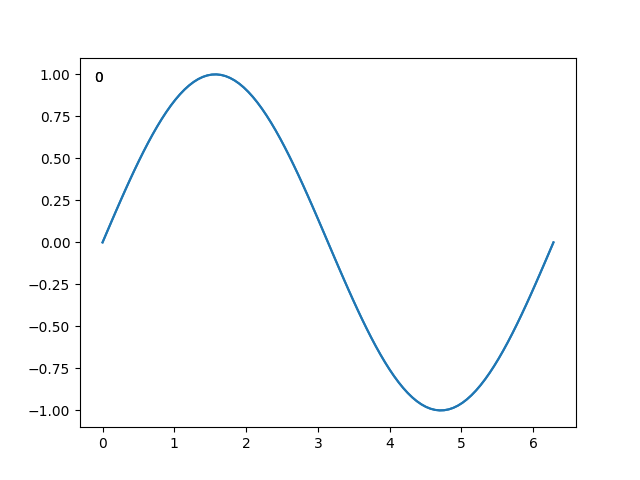

on_draw
_draw_animated


In [17]:
# make a new figure
fig, ax = plt.subplots()

import numpy as np

x = np.linspace(0, 2 * np.pi, 100)

# add a line
(ln,) = ax.plot(x, np.sin(x), animated=True)
# add a frame number
fr_number = ax.annotate(
    "0",
    (0, 1),
    xycoords="axes fraction",
    xytext=(10, -10),
    textcoords="offset points",
    ha="left",
    va="top",
    animated=True,
)
bm = BlitManager(fig.canvas, [ln, fr_number])
# make sure our window is on the screen and drawn
plt.show(block=False)
#plt.pause(.1)

In [20]:
import asyncio
for j in range(50):
    # update the artists
    ln.set_ydata(np.sin(x + (j / 100) * np.pi))
    fr_number.set_text(f"frame: {j}")
    # tell the blitting manager to do its thing
    asyncio.get_event_loop().run_in_executor(
        None,
        bm.update
    )
    #bm.update()

update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated


updateupdate
_draw_animated
update
_draw_animated

_draw_animated


update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
update
_draw_animated
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
update
_draw_animated
